<a href="https://colab.research.google.com/github/A-Wadhwani/ME597-Project/blob/main/Solar_Power_ANN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [428]:
#importing required libraries
%load_ext tensorboard
import tensorflow as tf
import keras as kr
import numpy as np
import pandas as pd
import datetime
import statistics as st
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras import regularizers


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [429]:
#Importing the dataset
#####data_df = pd.read_csv("/content/plant1_dataset_codes.csv")
data_df = pd.read_csv("/content/final_power_gen_data.csv")
data_df.head(10)


,Unnamed: 0,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAILY_YIELD,SOURCE_KEY
0,0,30.565992,35.559493,0.300622,4201.0,3
1,1,29.478612,35.143314,0.246631,5677.0,3
2,2,29.780109,34.626731,0.221183,6342.0,3
3,3,27.336694,31.618089,0.223914,7641.0,3
4,4,28.233016,33.349863,0.279030,9423.0,3
5,5,29.055461,34.782797,0.283242,9151.0,3
6,6,29.648566,36.748054,0.297248,9863.0,3
7,7,30.649599,36.909950,0.293333,9688.0,3
8,8,30.805943,37.116551,0.285688,4635.0,3
9,9,30.818429,36.567041,0.276635,9224.0,3


In [430]:
#Splitting dataset into X and Y variables
X_data = data_df[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','SOURCE_KEY']]
Y_data = data_df[['DAILY_YIELD']]

In [431]:
#Scaling the data
scaler1 = RobustScaler()
scaler2 = RobustScaler()

X_data_scaled = scaler1.fit_transform(X_data)
Y_data_scaled = scaler2.fit_transform(Y_data)

In [432]:
#Splitting the X and Y variables into train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X_data_scaled, Y_data_scaled, test_size=0.25)

In [433]:
#creating optimizer method
optimizer1 = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.8, beta_2=0.999, epsilon=1e-8)

In [434]:
# Creating and training the ANN model
model = Sequential()
model.add(Dense(512, input_dim = X_data.shape[1], activation='relu', kernel_initializer = 'random_normal'))
model.add(Dense(256, activation='relu', kernel_initializer = 'random_normal',  activity_regularizer=regularizers.l1(3.5e-4)))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu', kernel_initializer = 'random_normal'))#,  activity_regularizer=regularizers.l1(3.5e-4)))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu', kernel_initializer = 'random_normal'))#,  activity_regularizer=regularizers.l1(3.5e-4)))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu', kernel_initializer = 'random_normal'))#,  activity_regularizer=regularizers.l1(3.5e-4)))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu', kernel_initializer = 'random_normal'))#,  activity_regularizer=regularizers.l1(3.5e-4)))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mae', optimizer = optimizer1, metrics = ['mean_squared_error','mae'])

'''
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
'''
monitor = EarlyStopping(monitor ='val_loss', min_delta= 1e-3, patience = 50, verbose =1, restore_best_weights=True  )
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=20, verbose = 1)

#history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 300, verbose =1, callbacks = [monitor,''' tensorboard_callback,''' reduce_lr], batch_size = 15)
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 300, verbose =1, callbacks = [monitor, reduce_lr], batch_size = 5)

Epoch 1/300
178/178 [==============================] - 1s 7ms/step - loss: 0.4526 - mean_squared_error: 0.3046 - mae: 0.4505 - val_loss: 0.4558 - val_mean_squared_error: 0.3107 - val_mae: 0.4536
Epoch 2/300
178/178 [==============================] - 1s 4ms/step - loss: 0.4019 - mean_squared_error: 0.2726 - mae: 0.3996 - val_loss: 0.4253 - val_mean_squared_error: 0.3107 - val_mae: 0.4231
Epoch 3/300
178/178 [==============================] - 1s 4ms/step - loss: 0.4055 - mean_squared_error: 0.2813 - mae: 0.4034 - val_loss: 0.4399 - val_mean_squared_error: 0.3155 - val_mae: 0.4384
Epoch 4/300
178/178 [==============================] - 1s 5ms/step - loss: 0.4023 - mean_squared_error: 0.2848 - mae: 0.4005 - val_loss: 0.4155 - val_mean_squared_error: 0.3090 - val_mae: 0.4138
Epoch 5/300
178/178 [==============================] - 1s 4ms/step - loss: 0.3946 - mean_squared_error: 0.2765 - mae: 0.3929 - val_loss: 0.4283 - val_mean_squared_error: 0.3093 - val_mae: 0.4268
Epoch 6/300
178/178 [====

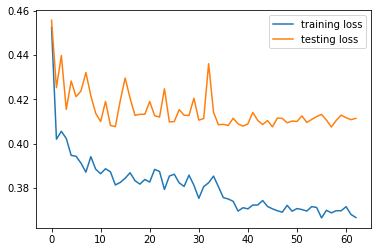

In [435]:
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='testing loss')
plt.legend()

In [436]:

#runs tensorboard
#%tensorboard --logdir logs/fit